In [1]:
pip install tensorflow

In [1]:
 %tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)

TensorFlow 1.x selected.
1.15.2


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.contrib.tensorboard.plugins import projector
from tensorflow.examples.tutorials.mnist import input_data


In [7]:
from google.colab import files
uploaded = files.upload()

Saving fashion-mnist_test.csv to fashion-mnist_test (1).csv
Saving fashion-mnist_train.csv to fashion-mnist_train (1).csv


In [8]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['fashion-mnist_test.csv']))
# Dataset is now stored in a Pandas Dataframe

In [9]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['fashion-mnist_train.csv']))
# Dataset is now stored in a Pandas Dataframe

In [10]:
#  import the data and split into X and Y

test_data = np.array(pd.read_csv(r'fashion-mnist_test.csv'), dtype='float32')

embed_count = 1600
x_test = test_data[:embed_count, 1:] / 255
y_test = test_data[:embed_count, 0]

logdir = r'C:\Users\Fashion_MNIST\logdir'  # you will need to change this!!!

In [11]:
# setup the write and embedding tensor

summary_writer = tf.summary.FileWriter(logdir)

embedding_var = tf.Variable(x_test, name='fmnist_embedding')

config = projector.ProjectorConfig()
embedding = config.embeddings.add()
embedding.tensor_name = embedding_var.name

embedding.metadata_path = os.path.join(logdir, 'metadata.tsv')
embedding.sprite.image_path = os.path.join(logdir, 'sprite.png')
embedding.sprite.single_image_dim.extend([28, 28])

projector.visualize_embeddings(summary_writer, config)

In [12]:

# run the sesion to create the model check point

with tf.Session() as sesh:
    sesh.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    saver.save(sesh, os.path.join(logdir, 'model.ckpt'))

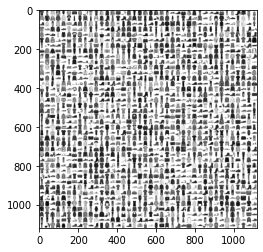

In [13]:

# create the sprite image and the metadata file

rows = 28
cols = 28

label = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boot']

sprite_dim = int(np.sqrt(x_test.shape[0]))

sprite_image = np.ones((cols * sprite_dim, rows * sprite_dim))

index = 0
labels = []
for i in range(sprite_dim):
    for j in range(sprite_dim):
        
        labels.append(label[int(y_test[index])])
        
        sprite_image[
            i * cols: (i + 1) * cols,
            j * rows: (j + 1) * rows
        ] = x_test[index].reshape(28, 28) * -1 + 1
        
        index += 1
        
with open(embedding.metadata_path, 'w') as meta:
    meta.write('Index\tLabel\n')
    for index, label in enumerate(labels):
        meta.write('{}\t{}\n'.format(index, label))
        
plt.imsave(embedding.sprite.image_path, sprite_image, cmap='gray')
plt.imshow(sprite_image, cmap='gray')
plt.show()